In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import seaborn as sns
import random 
import warnings
warnings.filterwarnings("ignore")
sns.set_style('whitegrid')
import matplotlib.gridspec as gridspec
import warnings
import operator
warnings.filterwarnings("ignore")

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',names=names)

In [3]:
df.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa



### Identifying Numerical and Categorical Features

In [4]:
def type_features(data):
    categorical_features = data.select_dtypes(include = ["object"]).columns
    numerical_features = data.select_dtypes(exclude = ["object"]).columns
    print( "categorical_features :",categorical_features)
    print('-----'*40)
    print("numerical_features:",numerical_features)

In [5]:
type_features(df)

categorical_features : Index(['class'], dtype='object')
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
numerical_features: Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width'], dtype='object')


### Number of records and Features  in the data

In [6]:
df.shape

(150, 5)

### Statistical Distribution of the data

In [7]:
print ("Statistical Distribution of Data: \n", df.describe())

Statistical Distribution of Data: 
        sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Creating Visualizations from the Data

### Checking the Data Distribution of Target Variable

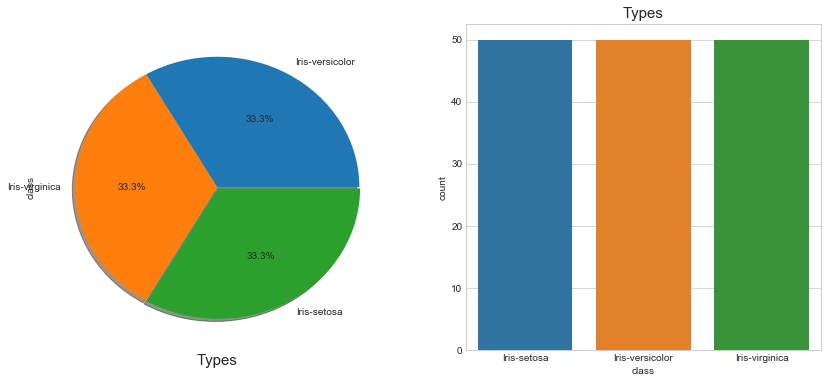

In [8]:
f,ax=plt.subplots(1,2,figsize=(14,6))

 #highoreder value need first
df["class"].value_counts().plot.pie(explode=[0,0.001,0.01],autopct='%1.1f%%',shadow=True,ax=ax[0])
ax[0].set_xlabel("Types", fontsize=15)

sns.countplot('class',data=df,ax=ax[1],).set_title("Types", fontsize=15)


plt.show()

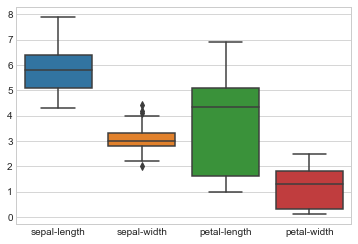

In [9]:
sns.boxplot(data=df)

In [10]:
# Types of colors
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']





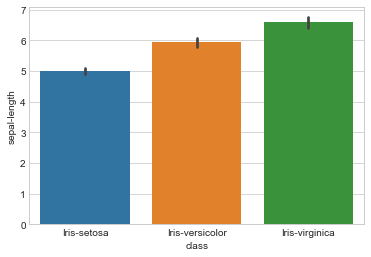

In [11]:
sns.barplot(y='sepal-length',x='class',data=df)

by looking at the above given plot it cler septal length has high range of value for Virginica.

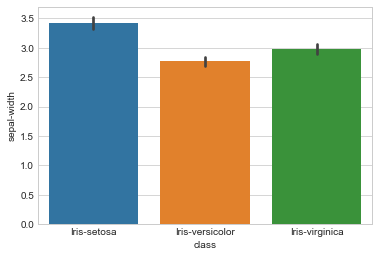

In [12]:
sns.barplot(y='sepal-width',x='class',data=df)

septal width has high range of value for setosa compare to others.

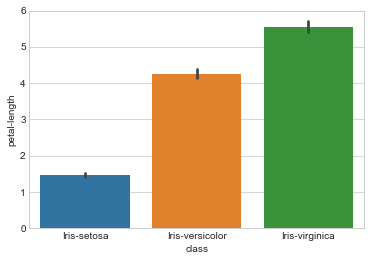

In [13]:
sns.barplot(x='class',y='petal-length',data=df)

petal length has high range of value for Virginica compare to others.

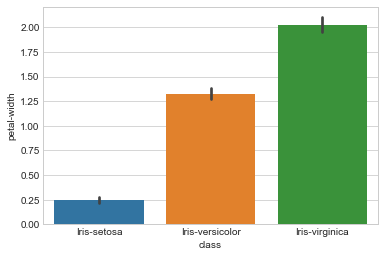

In [14]:
sns.barplot(x='class',y='petal-width',data=df)

petal width  has high range of value for Virginica.

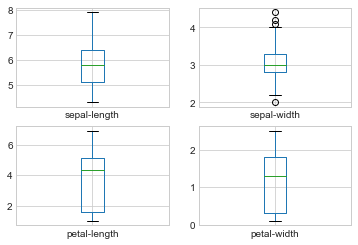

In [15]:
df.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False,)
plt.show()

## Histgram 

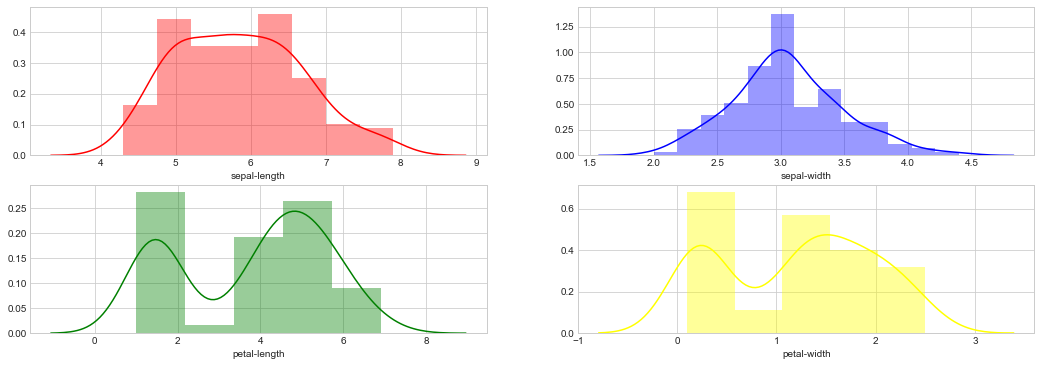

In [16]:
from scipy import stats
f,ax=plt.subplots(2,2,figsize=(18,6))
sns.distplot(df['sepal-length'],color='red',ax=ax[0,0])
sns.distplot(df['sepal-width'],color='blue',ax=ax[0,1])
sns.distplot(df['petal-length'],color='green',ax=ax[1,0])
sns.distplot(df['petal-width'],color='yellow',ax=ax[1,1])



### Visualizing pairwise relationships in a dataset

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This creates a matrix of axes and shows the relationship for each pair of columns in a DataFrame. by default, it also draws the univariate distribution of each variable on the diagonal 

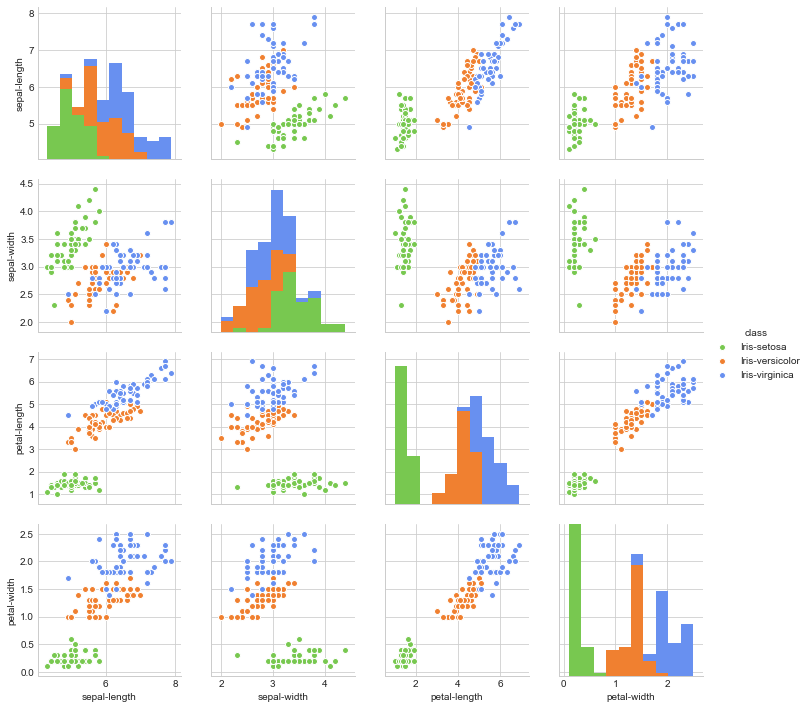

In [17]:
sns.pairplot(df,palette=color_types,hue='class')

###  Correlation Between The Features

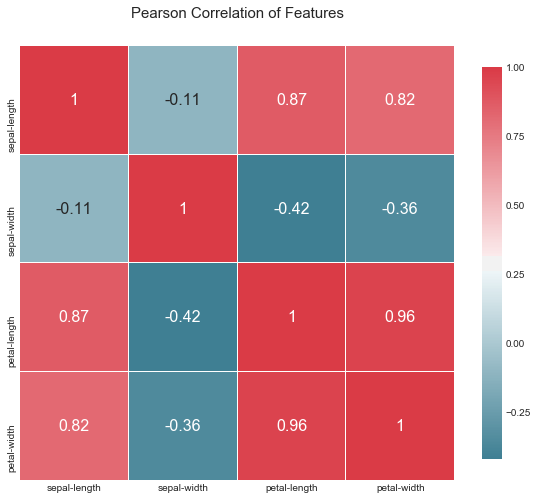

In [18]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(10,8))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':16}
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

### Spliting Data for training and test Model

In [19]:
from sklearn.model_selection import train_test_split

array = df.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [20]:
print("Original shape of Train dataset:", X_train.shape, Y_train.shape)
print("Original shape of Validation Dataset:", X_validation.shape, Y_validation.shape)

Original shape of Train dataset: (120, 4) (120,)
Original shape of Validation Dataset: (30, 4) (30,)


### Import Libraries

In [21]:
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score, make_scorer,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve
from sklearn import model_selection

### Buliding Logistic Regression Model

In [22]:
# Buliding  Logistic Model
from sklearn.linear_model import LogisticRegression
# Define the Logistic Regression Model
lr = LogisticRegression(class_weight='balanced')
# Fit the Logistic Regression Model to the train set
lr.fit(X_train, Y_train,)
print ("F1 Score is %2.2f" % f1_score(Y_validation, lr.predict(X_validation),average='macro'))

F1 Score is 0.82


### Apply 10-Fold Cross Validation for Logistic Regression

In [23]:
## define the scorce for based multi class 
scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Logistic Regression Model
lrCV = LogisticRegression( multi_class = 'ovr',class_weight='balanced')
# Train the Logistic Regression Model on the 10-Fold Cross Validation
lr_results = model_selection.cross_val_score(lrCV, X_train, Y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
lr_cv = lr_results.mean()
print("The Logistic Regression of 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (lr_cv, lr_results.std()))
## to get the clssification Report
print ("\n\n ---Logistic Regression Model Confusion Matrix---")
print(confusion_matrix(Y_validation, lr.predict(X_validation)))
print ("\n\n ---Logistic Regression Model Classification Report---")
print(classification_report(Y_validation, lr.predict(X_validation)))


The Logistic Regression of 10 Fold CV Score of the mean: 0.964 and the STD is (0.045)


 ---Logistic Regression Model Confusion Matrix---
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]


 ---Logistic Regression Model Classification Report---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30



### Support Vector Classifier Model 

In [24]:
from sklearn.svm import SVC 

svclassifier = SVC()  

svc = svclassifier.fit(X_train,Y_train)
print ("F1 Score is %2.2f" % f1_score(Y_validation, svc.predict(X_validation),average='macro'))

F1 Score is 0.94


### 10-Fold Cross Validation for Support Vector Classifier

In [25]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Model
svcCV = SVC( )
# Train the  Model on the 10-Fold Cross Validation
svc_results = model_selection.cross_val_score(svcCV, X_train, Y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
svc_cv = svc_results.mean()
print("The 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (svc_cv, svc_results.std()))
## to get the clssification Report
print ("\n\n ---Model Confusion Matrix---")
print(confusion_matrix(Y_validation, svc.predict(X_validation)))
print ("\n\n ---Model Classification Report---")
print(classification_report(Y_validation, svc.predict(X_validation)))

The 10 Fold CV Score of the mean: 0.990 and the STD is (0.029)


 ---Model Confusion Matrix---
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]


 ---Model Classification Report---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30



### Random Forest Classifier Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Model
rf = RandomForestClassifier()

# Fit the RF Model
rf = rf.fit(X_train, Y_train)
print ("F1 Score is %2.2f" % f1_score(Y_validation, rf.predict(X_validation),average='macro'))

F1 Score is 0.91


### Apply 10-Fold Cross Validation for Random Forest

In [27]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Logistic Regression Model
rfCV = RandomForestClassifier( )
# Train the Logistic Regression Model on the 10-Fold Cross Validation
rf_results = model_selection.cross_val_score(rfCV, X_train, Y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
rf_cv = rf_results.mean()
print("10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (rf_cv, rf_results.std()))
print ("\n\n ---Model Confusion Matrix---")
print(confusion_matrix(Y_validation, rf.predict(X_validation)))
## to get the clssification Report
print ("\n\n --- Model Classification Report---")
print(classification_report(Y_validation, rf.predict(X_validation)))

10 Fold CV Score of the mean: 0.953 and the STD is (0.048)


 ---Model Confusion Matrix---
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]


 --- Model Classification Report---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



### Naive Bayes Classifier Model

In [28]:
from sklearn.naive_bayes import GaussianNB

nbclassifier = GaussianNB()  

nb = nbclassifier.fit(X_train,Y_train)
print ("F1 Score is %2.2f" % f1_score(Y_validation, nb.predict(X_validation),average='macro'))

F1 Score is 0.86


In [30]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Model
nbCV = GaussianNB( )
# Train the  Model on the 10-Fold Cross Validation
nb_results = model_selection.cross_val_score(nbCV, X_train, Y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
nb_cv = nb_results.mean()
print("The 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (nb_cv, nb_results.std()))
print ("\n\n ---Model Confusion Matrix---")
print(confusion_matrix(Y_validation, nb.predict(X_validation)))
## to get the clssification Report
print ("\n\n ---Model Classification Report---")
print(classification_report(Y_validation, nb.predict(X_validation)))

The 10 Fold CV Score of the mean: 0.970 and the STD is (0.063)


 ---Model Confusion Matrix---
[[7 0 0]
 [0 9 3]
 [0 2 9]]


 ---Model Classification Report---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30



### Linear Discriminant Analysis Model

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldaclassifier = LinearDiscriminantAnalysis()  

lda = ldaclassifier.fit(X_train,Y_train)
print ("F1 Score is %2.2f" % f1_score(Y_validation, lda.predict(X_validation),average='macro'))

F1 Score is 0.97


In [32]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Model
ldaCV = LinearDiscriminantAnalysis( )
# Train the  Model on the 10-Fold Cross Validation
lda_results = model_selection.cross_val_score(ldaCV, X_train, Y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score
lda_cv = lda_results.mean()
print("The 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (lda_cv, lda_results.std()))
print ("\n\n ---Model Confusion Matrix---")
print(confusion_matrix(Y_validation, lda.predict(X_validation)))
## to get the clssification Report
print ("\n\n ---Model Classification Report---")
print(classification_report(Y_validation, lda.predict(X_validation)))

The 10 Fold CV Score of the mean: 0.970 and the STD is (0.046)


 ---Model Confusion Matrix---
[[ 7  0  0]
 [ 0 11  1]
 [ 0  0 11]]


 ---Model Classification Report---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.92      1.00      0.96        11

    avg / total       0.97      0.97      0.97        30



### LightGBM Classifier Model

In [34]:

import lightgbm as lgb
import xgboost as xgb

lgbclassifier = lgb.LGBMClassifier(class_weight='balanced', boosting_type='dart')


lg = lgbclassifier.fit(X_train,Y_train)
print ("F1 Score is %2.2f" % f1_score(Y_validation, lg.predict(X_validation),average='macro'))
lg_results=f1_score(Y_validation, lg.predict(X_validation),average='macro')
lg_cv = lg_results
## to get the clssification Report
print ("\n\n ---Model Classification Report---")
print(classification_report(Y_validation, lg.predict(X_validation)))

F1 Score is 0.86


 ---Model Classification Report---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30



In [36]:
# Define the 10-Fold Cross Validation
kfold = model_selection.KFold(n_splits=10, random_state=7)
# Define the Model
lgCV = lgb.LGBMClassifier(class_weight='balanced', boosting_type='dart')
#                       
# Train the  Model on the 10-Fold Cross Validation
lg_results = model_selection.cross_val_score(lgCV, X_train, Y_train, cv=kfold, scoring=scorer)
# Print out the mean and standard deviation of the training score#
lg_cv = lg_results.mean()
print("The 10 Fold CV Score of the mean: %.3f and the STD is (%.3f)" % (lg_cv, lg_results.std()))
## to get the clssification Report
print ("\n\n ---Model Classification Report---")
print(classification_report(Y_validation, lg.predict(X_validation)))

The 10 Fold CV Score of the mean: 0.944 and the STD is (0.064)


 ---Model Classification Report---
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.82      0.75      0.78        12
 Iris-virginica       0.75      0.82      0.78        11

    avg / total       0.84      0.83      0.83        30



### Comparing the model Performance

In [38]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'LDA', 
              'LightGBM'],
    'Score': [svc_cv, lr_cv, rf_cv, 
              nb_cv, lda_cv, lg_cv]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.990476
3,Naive Bayes,0.970185
4,LDA,0.969735
1,Logistic Regression,0.963848
2,Random Forest,0.952804
5,LightGBM,0.943730
